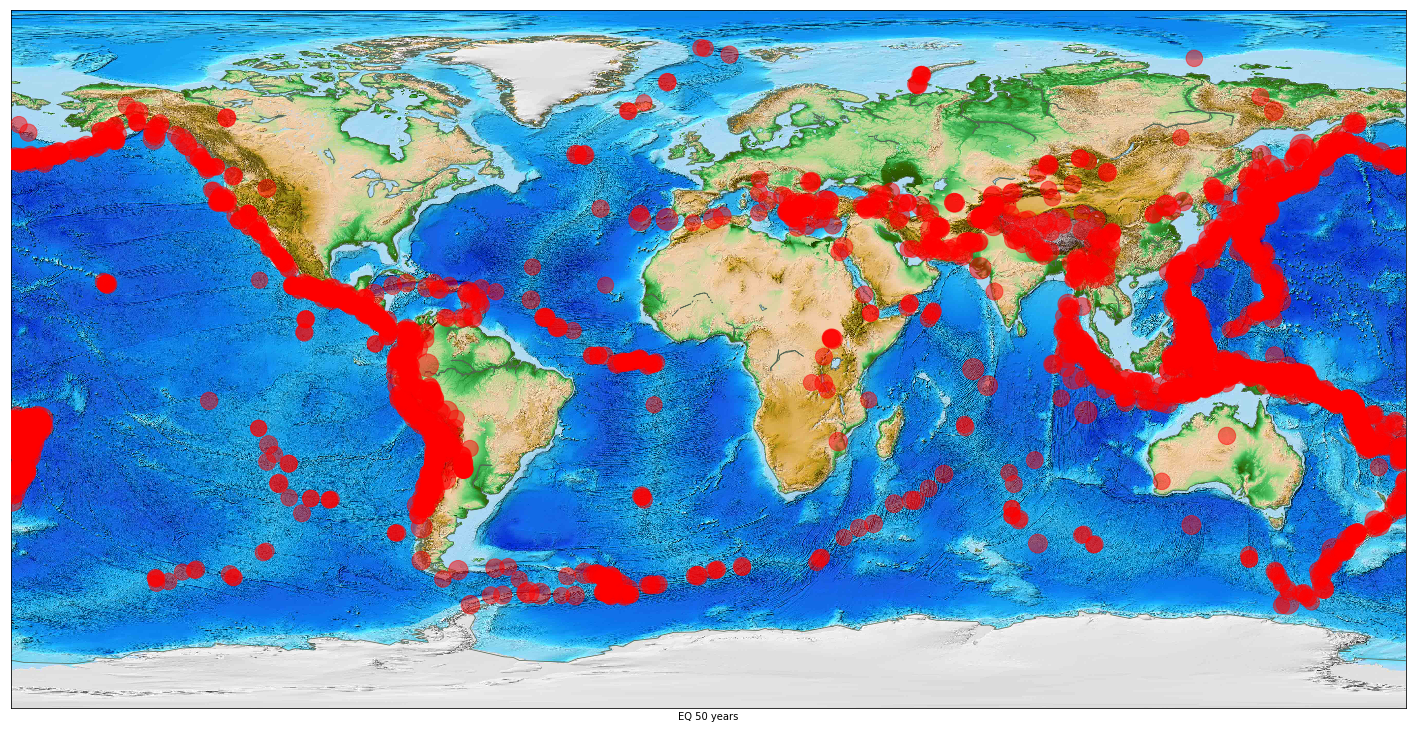

In [22]:
# %matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D

DATA_URL = 'earthquake.csv'
df = pd.read_csv(DATA_URL,parse_dates=[['Date', 'Time']])
df['date'] = pd.to_datetime(df['Date_Time'])
#df = df[df.date.between('2000-01-01 00:00', '2016-12-31 23:59')]
df = df[df.Magnitude>6.3]

fig, ax = plt.subplots(figsize=(25,25))

earth = Basemap(ax=ax)
earth.drawcoastlines(color='#556655', linewidth=0.75)
earth.etopo()

ax.scatter(df['Longitude'], df['Latitude'], [df['Magnitude'] ** 3,df['Depth'] ** 4], c='red', alpha=0.5, zorder=10)
ax.set_xlabel("EQ 50 years")
plt.show()


In [23]:
df.head(5)

,Date_Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date
5,1965-10-01 13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-10-01 13:36:32
11,1965-01-24 00:11:17,-2.608,125.952,Earthquake,20.0,NaN,NaN,8.2,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM861299,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-24 00:11:17
16,1965-04-02 05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,NaN,...,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965-04-02 05:01:22
26,1965-04-02 08:40:44,51.443,179.605,Earthquake,30.0,NaN,NaN,7.3,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM859264,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-04-02 08:40:44
27,1965-04-02 12:06:08,52.773,171.974,Earthquake,30.0,NaN,NaN,6.5,MW,NaN,...,NaN,NaN,NaN,NaN,ISCGEM859324,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-04-02 12:06:08


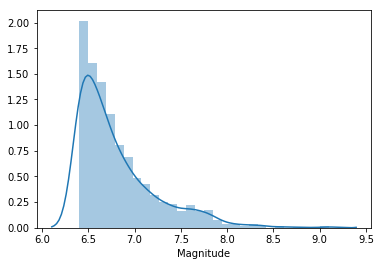

In [5]:
sns.distplot(df['Magnitude'])

Text(0.5, 1.0, 'Profondeurs')

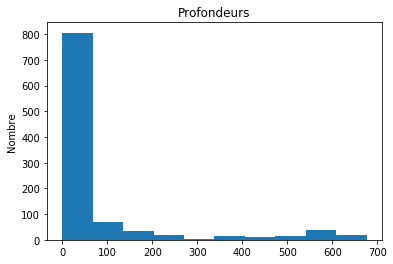

In [6]:
plt.hist(df['Depth'])
plt.ylabel('Nombre')
plt.title('Profondeurs')

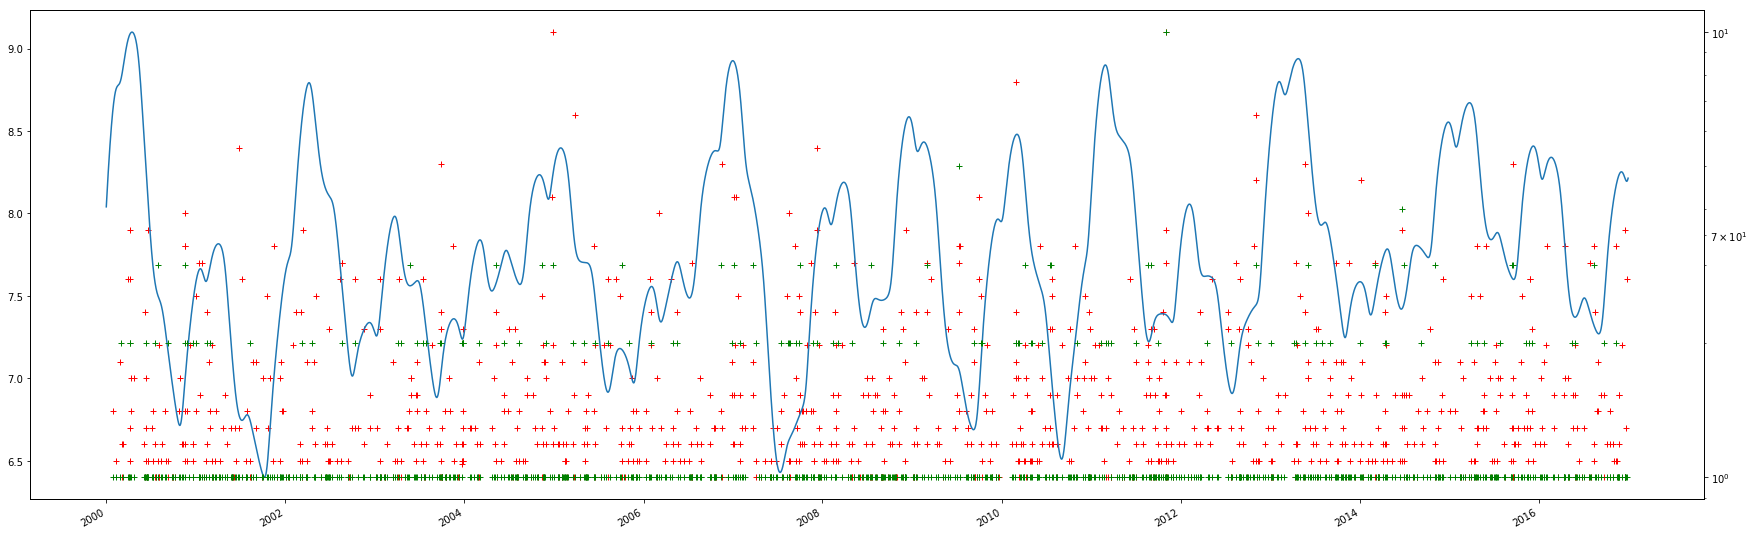

In [21]:
fig, xz = plt.subplots(figsize=(30,10))
xz.plot(df['Date_Time'],df['Magnitude'],'r+',label='EQ Magnitude')
xx = xz.twinx()
xy = xz.twinx()

##DATA NB Catastrophes
dz = pd.DataFrame(df.Date_Time.dt.date.value_counts())
dz = dz.rename(columns={'Date_Time': 'Catastrophes'})
dz['Date'] = dz.index.values
dz.sort_values(by='Date',inplace=True)
#dz.groupby('Date').mean().plot(ax=xz,kind='line',figsize=(10,5)).xaxis.set_major_locator(mdates.YearLocator())
xy.set_yscale("log", nonposy='clip')
xy.plot(dz['Date'],dz['Catastrophes'],'g+',label='EQ Count')

##DATA PLANET DST
DATA_URL2 = 'planet_dst_20.csv'
dx = pd.read_csv(DATA_URL2)
dx['Date'] = pd.to_datetime(dx['date'])
dx = dx[dx.date.between('2000-01-01', '2016-12-31')]
ret = {}
for index, row in dx.iterrows():
    ret[index]=({'date': row['date'],
                 'combined': row['sun']+row['moon']+row['mercury']+row['venus']+row['mars']+row['jupiter']+row['saturn']+row['uranus']+row['neptune'],
                 'mmv': row['jupiter']+row['venus']+row['mars']+row['mercury']+row['saturn']+row['uranus']+row['neptune']
                })
data = pd.DataFrame.from_dict(ret, orient='index')
data['Date'] = pd.to_datetime(data['date'])
#data.set_index('Date').plot(ax=xx,logy=True,rot=45,figsize=(10,5))
xx.set_yscale("log", nonposy='clip')
xx.plot(data['Date'],data[['combined']],label='distance')

plt.gcf().autofmt_xdate()
plt.show()